In [ ]:
!pip install wheel
!pip install pandas

In [2]:
conservation = ['abatement', 'Recycling', 'durability','consistency', 'alleviate', 'enable', 'accommodate', 'handle', 'promote',
                'manage', 'conserve', 'maximize',  'unmodified','conservancy', 'ecological', 'exergy', 'conservation','balance', 'saving',
                'cultivation', 'reuse','development', 'low-carbon', 'sustainability', 'economy', 'implementation', 'planning', 'future',
                'development,', 'evolution', 'dominance','formation', 'regenerator', 'exploitation', 'lowcarbon', 'adoption', 'awareness',
               'development', 'flowering', 'germination',  'storing', 'growing', 'considerable','Territorial', 'continually',
                'mitigation', 'adaptation', 'agricultural', 'resource', 'manufacturing', 'moderation','ecosystems','preservation', 'nature', 
                'compatibility',  'availability', 'existence',  'progress','proliferation', 'reclaim', 'recover','extract', 'generate',
                'produce', 'replace', 'alleviate', 'deliver', 'regain','stored', 'relieve', 'keep', 'raise', 'maintain', 'regulate', 'adjust', 
                'resilience','resiliency', 'retrieve','activate', 'sustainable', 'low-carbon', 'sustainability', 'development,', 'planning', 
                'future', 'management','vegetation', 'climate',]


In [3]:
loss = ['affect', 'cause','alter','alarm', 'apprehension', 'perils', 'attack','infections','bite','burn','deforestation', 'corrosion,', 
        'catastrophe', 'impossibility','cutoff', 'damage', 'prevent', 'avoid', 'minimize', 'lose', 'noise', 'danger', 'implication', 'destructive', 
        'instability', 'conflict', 'disease', 'death', 'deformation','failure', 'demolishing','extreme', 'problem', 'demolition','premature', 
        'departure', 'deprivation', 'destruction', 'loss', 'irreversibility', 'minimizing', 'degradation','detriment', 'death' 'exacerbated', 
        'devastation', 'difficulty', 'nature','lack','complexity', 'instability', 'disaster', 'injury', 'flood', 'restrictions' 'disintegration',
         'dislocation','Neglecting','distort', 'binding', 'deleterious','distortion', 'disturb', 'dread', 'decay', 'corruption',
         'revoke', 'famine', 'morbidity', 'floods', 'fear', 'deconstruction', 'hardship', 'inability', 'harm', 'damages', 'threats', 
       'risks','hazard', 'hindrance', 'distraction','worse', 'horror','hurt','impact','effects','degradation', 'risk', 'impediment', 'tied',
        'decompose', 'implicate', 'polluters','inconvenience', 'obstruct', 'riots', 'injury','Hazardous','jeopardize','wildfires', 
        'kill','EMISSIONS', 'lethality', 'SARS-CoV-2', 'limit','critical', 'limits', 'fluctuation', 'limitation', 'losses',
       'stress', 'leakage', 'destruction', 'resistance', 'meltdown', 'diseases', 'menace','dangers', 'Decline','mess', 'peril',
        'fast-spreading','plague','alterations', 'challenge', 'restriction', 'risk','degradation','sabotage',  'WASTES', 
        'scare','severity', 'aggravation', 'blockage', 'bending','stress','irreversibilities', 'toughness','externalities', 
         'stiffness','trauma', 'wastage', 'crisis','wound']


In [8]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text
## In this example author, year and title are expressed in the file name 

import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

/content
Vivekh etal-2015-Desalination.txt
Zisisetal-2006-heat.txt
esfahankalteh-2020-Achieving.txt
ismail-2012-energy eff.txt
Sun-2020-water shed water pollution.txt
Lazzarin etal-2013-annual air conditioning.txt
auid etal-2013-Organic Rankine cycles.txt
sampedro etal-2016-Spanish.txt
haghighi and maerefat-2014-Design.txt
fang etal-2017-Experimental.txt
zhang etal-2010-performanc.txt
Maheshwari etal-2009-performance analysis.txt
nygard-2012-Review.txt
hegazy etal-2017-The living building.txt
khoshbazan etal-2018-Thermo economic analy.txt
renato etal-2009-Energetic.txt
Newton etal-2011-nanoparticle.txt
amhadi and assaf-2019-Assessment.txt
Ashouri etal-2015-organic rankine cycle.txt
yu-2018-Theeconomic.txt
zishang-2012-Assessment.txt
salman-2020-Thermal.txt
jiang etal-2010-solar thermosyphon systems.txt
Riffat etal-2013-experimental investigation.txt
shuai-2018-Whatdo.txt
sawant-2011-Performance.txt
teixeira-2010-Temperature.txt
spataru-2010-Domestic energy and occupancy.txt
rao-2013-An

In [9]:
len(data_to_df)

607

In [10]:
## Here we create the dataset using the list of lists created above
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text'])
  
# print dataframe.
df

author  ...                                     tokenized_text
0             Vivekh etal  ...  [Desalination, technology, selection, using, m...
1               Zisisetal  ...  [Investigation, of, the, performance, of, heat...
2           esfahankalteh  ...  [Achieving, wind, comfort, through, window, de...
3                  ismail  ...  [Energy, efficiency, assessment, of, integrate...
4                     Sun  ...  [Ecological, impact, of, watershed, water, pol...
..                    ...  ...                                                ...
602              michelle  ...  [A, preliminary, testing, of, a, flat, panel, ...
603               Bi etal  ...  [Ecological,, exergetic, efficiency, and, heat...
604  goshayeshi and chaer  ...  [Comparison, of, copper, and, glass, oscillati...
605         Bozonnet etal  ...  [Modeling, methods, to, assess, urban, fluxes,...
606             alexander  ...  [Solid, sorption, coolers, for, tri-generation...

[607 rows x 4 columns]

In [11]:
## First we install the potentially important packages

!pip install unidecode
!pip install word2number
!pip install contractions
!pip install bs4
!pip install nltk
!pip install inflect

     |████████████████████████████████| 235 kB 5.2 MB/s 
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=199ee134b8c4989cef117661bbf41be044694b1cd03892fe8201d09bec356f73
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
     |████████████████████████████████| 284 kB 5.1 MB/s 
     |████████████████████████████████| 321 kB 43.5 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85443 sha256=dd993f0b981bfc1404a3e52abd0a7b3527d1d1f92389da7fc5ab65a0c392a5bd
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [12]:
## we import all the modules
from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import contractions
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import inflect
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import json
## these are variables that our functions need
stop_words = set(stopwords.words('english'))
lemma=WordNetLemmatizer()
p = inflect.engine()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
## WE DEFINE ALL THE FUNCTIONS WE WILL NEED

## This function removes any mention to website 
## this application of re.sub() substitutes strings in the input starting with http with ''
def clean_url(input):
  output = re.sub(r'http\S+', '', input)
  return output

## This function fixes contractions - turns "don't" into "do not", or "can't" into "can not"
def fix_contraction(input):
  output = contractions.fix(input)
  return output

## This function finds all non-alphanumeric characters [^a-zA-Z] and substitutes them with '' 
def clean_non_alphanumeric(input):
  output = re.sub(r'[^a-zA-Z0-9]', ' ', input)
  return output

## This function finds all non-alphabetic characters [^a-zA-Z] and substitutes them with '' 
def clean_non_alphabetic(input):
  output = re.sub(r'[^a-zA-Z0-9]', ' ', input)
  return output

## This function takes a string with both lower and upper case elements and returns only lower case elements
def clean_lowercase(input):
  output = str(input).lower()
  return output

## The function tokenize takes a string as input and returns a list of tokens 
def clean_tokenization(input):
  output = word_tokenize(input)
  return output

## eliminate stop words
def clean_stopwords(input):
  output = [item for item in input if item not in stop_words]
  return output

## This function turns numeric values into words, "6" into "six"
def numbers_to_words(input):
  output =[]
  for item in input:
    if item.isnumeric()==True:
      output += [p.number_to_words(item)]
    else:
      output +=[item]
  return output

## Lemmatize tokens
def clean_lemmatization(input):
  output = [lemma.lemmatize(word=w, pos='v') for w in input]
  return output

## in this function we create a new list that includes only words with lenght > 2
def clean_length(input):
  output= [word for word in input if len(word) > 2]
  return output

## COUNT WORD FREQUENCIES
def count_word_frequencies(input):
  word_count = nltk.FreqDist(input)
  word_count_most_common= word_count.most_common()
  output = [(count[0],count[1]/len(input)) for count in word_count_most_common]
  return output

## finally, after al the filtering steps, we can put the string back together
def convert_to_string(input):
  output = ' '.join(input)
  return output


In [14]:
## We define the preprocessing pipeline as a function

def preprocessing(input):
  after_url_clean = clean_url(input)
  contractions_fixed = fix_contraction(after_url_clean)
  only_alphanumeric = clean_non_alphabetic(contractions_fixed)
  lower_cased = clean_lowercase(only_alphanumeric)
  tokenized = clean_tokenization(lower_cased)
  fixed_numbers = numbers_to_words(tokenized)
  without_stop_words = clean_stopwords(fixed_numbers)
  lemmatized = clean_lemmatization(without_stop_words)
  bigger_than_two = clean_length(lemmatized)
  word_frequencies = count_word_frequencies(bigger_than_two)
  filtered_string = convert_to_string(bigger_than_two)

  return(filtered_string)

In [15]:
## Create a column with clean text


df['CleanText'] = df['tokenized_text'].apply(str).apply(preprocessing)
df

author  ...                                          CleanText
0             Vivekh etal  ...  desalination technology selection use multi cr...
1               Zisisetal  ...  investigation performance heat pip use capilla...
2           esfahankalteh  ...  achieve wind comfort window design residential...
3                  ismail  ...  energy efficiency assessment integrate noninte...
4                     Sun  ...  ecological impact watershed water pollution co...
..                    ...  ...                                                ...
602              michelle  ...  preliminary test flat panel grind heat exchang...
603               Bi etal  ...  ecological exergetic efficiency heat load opti...
604  goshayeshi and chaer  ...  comparison copper glass oscillate heat pip fe2...
605         Bozonnet etal  ...  model methods assess urban flux heat island mi...
606             alexander  ...  solid sorption coolers tri generation alexande...

[607 rows x 5 columns]

In [16]:
## Create a function to calculate word counts of a particular bag of words

from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)



In [20]:
count_BOW(['conservation','loss','i'],df['tokenized_text'][0])

Counter({'': 505, 'the': 367, '0': 295, 'of': 244, 'and': 183, '1': 121, 'for': 116, 'in': 99, 'to': 82, 'is': 80, 'desalination': 69, 'a': 64, 'values': 51, 'technology': 50, 'A1': 49, 'as': 45, 'Table': 45, 'A5': 45, 'The': 44, 'A3': 44, 'A4': 43, 'A2': 42, 'from': 39, 'selection': 37, 'by': 37, 'be': 37, 'was': 37, 'function': 37, 'using': 36, 'were': 36, 'water': 35, 'criteria': 35, 'difference': 34, 'on': 33, 'preference': 33, 'with': 31, '5': 28, 'TOPSIS': 26, '2': 26, 'Max': 24, 'matrix': 24, 'energy': 22, 'Pairwise': 22, '3': 21, 'MCE': 20, 'Min': 20, 'PROMETHEE-2': 19, '000': 19, '7': 19, 'an': 18, 'are': 18, 'criterion': 18, 'payoff': 18, 'ideal': 18, 'have': 17, 'alternative': 17, '0.143': 17, 'solution': 16, '0.007': 16, 'Criterion': 16, 'that': 15, 'alternatives': 15, 'each': 15, '4': 15, 'which': 14, 'been': 14, 'ED': 14, 'these': 14, 'various': 14, '¼': 14, '0.2': 14, '50': 14, 'process': 13, 'can': 13, 'International': 13, '12,': 13, 'this': 13, 'decision': 13, 'obtaine

0

In [23]:
## count all the words in each text pertaining to the bag of words conservation and loss

list_conservation_counts=[]
list_loss_counts=[]

for text in df['tokenized_text']:
  conservation_count = count_BOW(conservation, text)
  list_conservation_counts+=[conservation_count]

  loss_count = count_BOW(loss, text)
  list_loss_counts+=[loss_count]

Streaming output truncated to the last 5000 lines.
hazard 0
hindrance 0
distraction 0
worse 0
horror 0
hurt 0
impact 0
effects 0
degradation 0
risk 0
impediment 0
tied 0
decompose 0
implicate 0
polluters 0
inconvenience 0
obstruct 0
riots 0
injury 0
Hazardous 0
jeopardize 0
wildfires 0
kill 0
EMISSIONS 0
lethality 0
SARS-CoV-2 0
limit 0
critical 0
limits 0
fluctuation 0
limitation 0
losses 1
stress 0
leakage 0
destruction 0
resistance 0
meltdown 0
diseases 0
menace 0
dangers 0
Decline 0
mess 0
peril 0
fast-spreading 0
plague 0
alterations 0
challenge 0
restriction 0
risk 0
degradation 0
sabotage 0
WASTES 0
scare 0
severity 0
aggravation 0
blockage 0
bending 0
stress 0
irreversibilities 0
toughness 0
externalities 0
stiffness 0
trauma 0
wastage 0
crisis 0
wound 0
Counter({'': 360, 'the': 143, 'of': 135, 'and': 120, 'cycle': 89, 'for': 84, '=': 83, 'in': 77, 'is': 64, 'combined': 62, 'CO2': 53, '−': 53, 'power': 49, 'gas': 46, 'transcritical': 42, 'temperature': 41, 'loss': 39, 'Exergy':

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
consistency 0
alleviate 0
enable 0
accommodate 0
handle 0
promote 0
manage 0
conserve 0
maximize 0
unmodified 0
conservancy 0
ecological 0
exergy 0
conservation 2
balance 1
saving 0
cultivation 0
reuse 0
development 0
low-carbon 0
sustainability 0
economy 0
implementation 0
planning 0
future 0
development, 0
evolution 0
dominance 0
formation 0
regenerator 7
exploitation 0
lowcarbon 0
adoption 0
awareness 0
development 0
flowering 0
germination 0
storing 0
growing 0
considerable 2
Territorial 0
continually 0
mitigation 0
adaptation 0
agricultural 0
resource 0
manufacturing 0
moderation 0
ecosystems 0
preservation 0
nature 0
compatibility 0
availability 0
existence 0
progress 0
proliferation 0
reclaim 0
recover 8
extract 0
generate 0
produce 2
replace 0
alleviate 0
deliver 0
regain 0
stored 0
relieve 0
keep 1
raise 0
maintain 0
regulate 0
adjust 0
resilience 0
resiliency 0
retrieve 0
activate 0
sustainable 0
low-carbon 0
sustainability 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
moderation 0
ecosystems 0
preservation 0
nature 0
compatibility 0
availability 0
existence 0
progress 0
proliferation 0
reclaim 0
recover 0
extract 0
generate 0
produce 0
replace 0
alleviate 0
deliver 0
regain 0
stored 0
relieve 1
keep 0
raise 0
maintain 2
regulate 0
adjust 0
resilience 0
resiliency 0
retrieve 0
activate 0
sustainable 0
low-carbon 0
sustainability 0
development, 0
planning 0
future 0
management 0
vegetation 0
climate 0
Counter({'the': 213, 'of': 183, '': 142, 'in': 72, 'and': 56, 'with': 49, 'gas': 48, 'to': 48, 'steam': 44, 'GTU': 43, 'The': 38, 'a': 37, 'power': 36, 'by': 35, 'for': 31, 'is': 29, 'on': 29, 'combustion': 25, 'are': 24, 'unit': 23, 'topping': 23, 'partial': 22, 'MW': 22, 'oxidation': 18, 'this': 18, 'boiler': 18, 'flow': 18, 'as': 17, 'kg/s': 17, 'natural': 16, 'characteristics': 16, 'products': 16, 'efficiency': 15, 'from': 15, 'gas-turbine': 15, 'additional': 15, 'STU': 15, 'Figure': 15, '¼': 15, 'tu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
sustainability 0
development, 0
planning 0
future 1
management 0
vegetation 0
climate 0
Counter({'of': 215, 'the': 194, 'energy': 130, '': 112, 'and': 92, 'to': 62, 'a': 59, 'is': 54, 'in': 54, 'for': 44, 'The': 35, 'system': 34, 'on': 32, 'fuel': 28, 'by': 28, 'wind': 26, 'be': 25, 'storage': 22, 'secondary': 22, 'that': 21, 'with': 19, 'efficiency': 18, 'power': 18, 'at': 18, '¼': 18, 'are': 17, 'from': 17, 'economic': 16, 'At': 16, 'final': 16, 'price': 16, 'it': 16, 'can': 15, 'jt': 15, 'cost': 14, 'not': 14, 'BPP': 14, 'an': 13, '[': 13, 'gas': 13, 'diesel': 12, 'as': 12, 'into': 11, 'supply': 11, 'For': 11, 'time': 11, 'X': 11, 'use': 11, 'conversion': 10, 'plant': 10, 'operation': 10, 'electricity': 10, 'some': 10, 'þ': 10, 'autonomous': 9, 'primary': 9, 'costs': 9, 'conditions': 9, 'International': 9, 'plants': 8, 'produced': 8, 'WT': 8, 'speed': 8, 'Energy': 8, 'considered': 8, 'T': 8, 'j': 8, 'wood': 8, 'modeling': 7, 'mathem

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
danger 0
implication 0
destructive 0
instability 0
conflict 0
disease 0
death 0
deformation 0
failure 0
demolishing 0
extreme 0
problem 0
demolition 0
premature 0
departure 0
deprivation 0
destruction 0
loss 0
irreversibility 0
minimizing 0
degradation 0
detriment 0
deathexacerbated 0
devastation 0
difficulty 1
nature 0
lack 0
complexity 1
instability 0
disaster 0
injury 0
flood 0
restrictionsdisintegration 0
dislocation 0
Neglecting 0
distort 0
binding 0
deleterious 0
distortion 0
disturb 0
dread 0
decay 0
corruption 0
revoke 0
famine 0
morbidity 0
floods 0
fear 0
deconstruction 0
hardship 0
inability 0
harm 0
damages 0
threats 0
risks 0
hazard 0
hindrance 0
distraction 0
worse 0
horror 0
hurt 0
impact 0
effects 1
degradation 0
risk 0
impediment 0
tied 0
decompose 0
implicate 0
polluters 0
inconvenience 0
obstruct 0
riots 0
injury 0
Hazardous 0
jeopardize 0
wildfires 0
kill 0
EMISSIONS 0
lethality 0
SARS-CoV-2 0
limit 0
critical 0
lim

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
wound 0
Counter({'the': 461, 'of': 253, 'and': 155, '': 117, 'is': 112, 'a': 107, 'in': 105, 'to': 102, 'air': 83, 'cooling': 72, 'system': 72, 'by': 62, 'for': 54, 'desiccant': 50, 'energy': 47, 'The': 47, 'on': 46, 'with': 45, 'as': 43, 'heat': 40, 'electric': 39, 'Figure': 38, 'water': 37, 'are': 34, 'exchanger': 33, 'systems': 32, 'power': 31, 'be': 30, '†': 30, 'chiller': 29, 'an': 28, 'process': 28, 'from': 27, 'this': 26, 'desiccant-based': 25, 'that': 25, '¼': 25, 'III': 25, 'thermal': 24, 'EER': 24, 'In': 23, 'Energy': 22, 'humidifier': 21, 'global': 20, 'can': 20, 'at': 20, 'about': 20, '\x03': 20, '–': 20, 'flow': 19, 'consumption': 19, 'HVAC': 19, 'regeneration': 18, 'et': 18, 'al.': 18, 'has': 18, 'effectiveness': 17, 'influence': 16, 'related': 16, 'efficiency': 16, 'natural': 15, 'A': 15, 'nominal': 15, 'm3/s': 15, 'temperature': 14, 'PES': 14, 'B': 14, 'between': 13, 'test': 13, 'used': 13, 'analysis': 12, 'performance'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
alleviate 0
deliver 0
regain 0
stored 0
relieve 0
keep 0
raise 0
maintain 0
regulate 0
adjust 0
resilience 0
resiliency 0
retrieve 0
activate 0
sustainable 0
low-carbon 0
sustainability 0
development, 0
planning 0
future 0
management 0
vegetation 0
climate 0
Counter({'the': 367, '': 271, 'of': 211, 'and': 140, 'a': 105, 'to': 102, 'for': 89, 'was': 82, 'The': 69, 'in': 66, 'be': 63, 'by': 62, 'wind': 55, 'is': 53, 'system': 49, 'solar': 48, 'on': 48, 'from': 38, 'this': 37, 'energy': 36, 'power': 35, 'with': 34, 'cost': 33, 'data': 33, 'that': 30, 'radiation': 27, 'Table': 26, 'supply': 24, 'as': 23, 'are': 22, 'at': 21, 'building': 20, 'not': 20, 'were': 18, 'hybrid': 17, 'found': 17, 'total': 17, 'proposed': 17, 'rural': 16, 'angle': 16, 'International': 16, 'January': 16, 'water': 16, 'Journal': 15, 'Low': 15, 'Carbon': 15, 'Technologies': 15, '1/2': 15, 'Downloaded': 15, 'https://academic.oup.com/ijlct/article/1/2/112/660894': 15, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
limitation 0
losses 0
stress 0
leakage 0
destruction 0
resistance 0
meltdown 0
diseases 0
menace 0
dangers 0
Decline 0
mess 0
peril 0
fast-spreading 0
plague 0
alterations 0
challenge 0
restriction 0
risk 2
degradation 0
sabotage 0
WASTES 0
scare 0
severity 0
aggravation 0
blockage 0
bending 0
stress 0
irreversibilities 0
toughness 0
externalities 0
stiffness 0
trauma 0
wastage 0
crisis 0
wound 2
Counter({'the': 256, 'of': 159, 'wind': 106, 'a': 99, '': 93, 'and': 87, 'to': 57, 'in': 49, 'system': 42, 'The': 42, 'is': 41, 'solar': 36, 'turbine': 36, 'for': 32, 'with': 32, 'parabolic': 30, 'CSCWA': 30, 'Case': 30, 'concentrator': 29, 'that': 27, 'augmentation': 25, 'be': 24, 'dish': 24, 'was': 24, 'm': 24, 'power': 23, 'on': 21, '¼': 21, 'ratio': 19, 'by': 19, 'CPV': 19, 'energy': 18, 'speed': 18, 'at': 17, 'tail': 17, 'duct': 17, 'diffuser': 17, 'may': 16, 'output': 16, 'velocity': 15, 'A': 14, 'increase': 14, 'Figure': 14, 'mode': 14,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
## Add the counts of bags of words to the dataFrame

df['conservation'] = list_conservation_counts
df['loss'] = list_loss_counts

df

author  year  ... conservation loss
0             Vivekh etal  2015  ...           35   19
1               Zisisetal  2006  ...            9    2
2           esfahankalteh  2020  ...           25   21
3                  ismail  2012  ...           15   13
4                     Sun  2020  ...           30   11
..                    ...   ...  ...          ...  ...
602              michelle  2013  ...            4   11
603               Bi etal  2009  ...           75   16
604  goshayeshi and chaer  2016  ...            3   15
605         Bozonnet etal  2013  ...          172   54
606             alexander  2013  ...            9    1

[607 rows x 7 columns]

In [25]:
## Calculate a climate to damage ratio

df['cons-loss-ratio'] = (df['conservation'] - df['loss'])/(df['conservation'] + df['loss'])

df

author  year  ... loss cons-loss-ratio
0             Vivekh etal  2015  ...   19        0.296296
1               Zisisetal  2006  ...    2        0.636364
2           esfahankalteh  2020  ...   21        0.086957
3                  ismail  2012  ...   13        0.071429
4                     Sun  2020  ...   11        0.463415
..                    ...   ...  ...  ...             ...
602              michelle  2013  ...   11       -0.466667
603               Bi etal  2009  ...   16        0.648352
604  goshayeshi and chaer  2016  ...   15       -0.666667
605         Bozonnet etal  2013  ...   54        0.522124
606             alexander  2013  ...    1        0.800000

[607 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


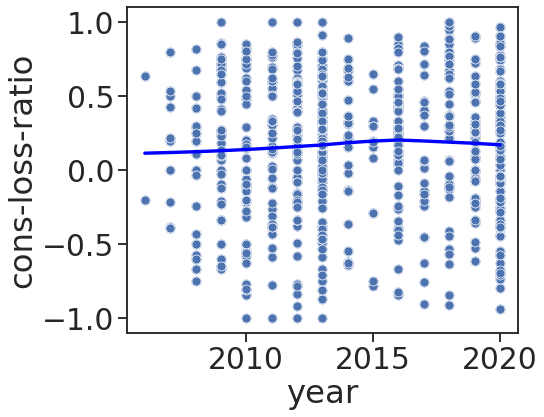

In [27]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df, lowess=True, line_kws={"color": "blue"}, x="year", y="cons-loss-ratio")
sns.scatterplot(data=df, x="year", y="cons-loss-ratio", ci=None)



In [29]:
new_df = df.drop(['tokenized_text', 'conservation','loss'], axis=1)
new_df.to_csv('cons_loss.csv')